<a href="https://www.kaggle.com/code/gerardomacias/regression-using-multiple-linear-regression?scriptVersionId=216295285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Tratamiento de Datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Proceso y modelado
from sklearn.linear_model import Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler

#configuracion matplotlib
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use('ggplot')

#configuracion warnings
import warnings
warnings.filterwarnings('ignore')

**Lo que queremos es hacer una regresión sobre nuestra variable de interes(target) que es la columna sales**

In [2]:
#Cargando datos
df = pd.read_csv('/kaggle/input/marketing/marketing.csv')
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


**Primero chequemos la relácion que hay entre nuestras variables**\
Esta información es muy importante para identificar cuales pueden ser los mejores predictores
para el modelo y para detectar colinealidad entre predictores

In [3]:
#Matriz de correlación
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

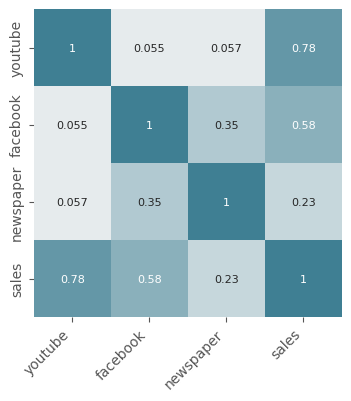

In [4]:
#Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

sns.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {'size':8},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square = True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize=10)

en el grafico de arriba podemos ver que hay una correlacion alta entre las ventas y youtube, a su vez tambien hay una correlacion considerable entre las ventas y facebook. Esto nos puede generar un problmea, pues tenemos mas de dos variables correlacionadas, lo que nos provocaria un problema de multicolinealidad. Para poder arreglar esto, tenemos que usar tecnicas de reduccion de dimensionalidad.

In [5]:
y, X = dmatrices('sales ~ youtube + facebook + newspaper', data=df, return_type='dataframe')

In [6]:
mod = sm.OLS(y, X) 
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        06:13:34   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

**Podemos ver que el coeficiente de determinacion es de 0.89 que es un buen valor.\
Tambien vemos que el numero de condicion es moderadamente alto, lo cual puede representar una multicolinealidad moderada.**

Text(0.5, 0.98, 'Distribución variables númericas')

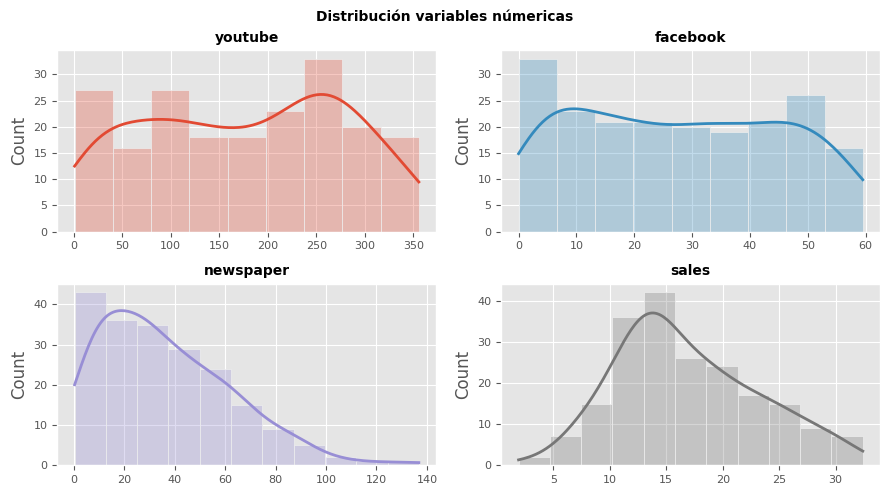

In [7]:
#grafico de distribución para cada variable númerica
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(9,5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64','int']).columns

for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data = df,
        x = column,
        stat = 'count',
        kde = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha = 0.3,
        ax = axes[i]
    )
    axes[i].set_title(column, fontsize=10, fontweight='bold')
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables númericas', fontsize=10, fontweight='bold')

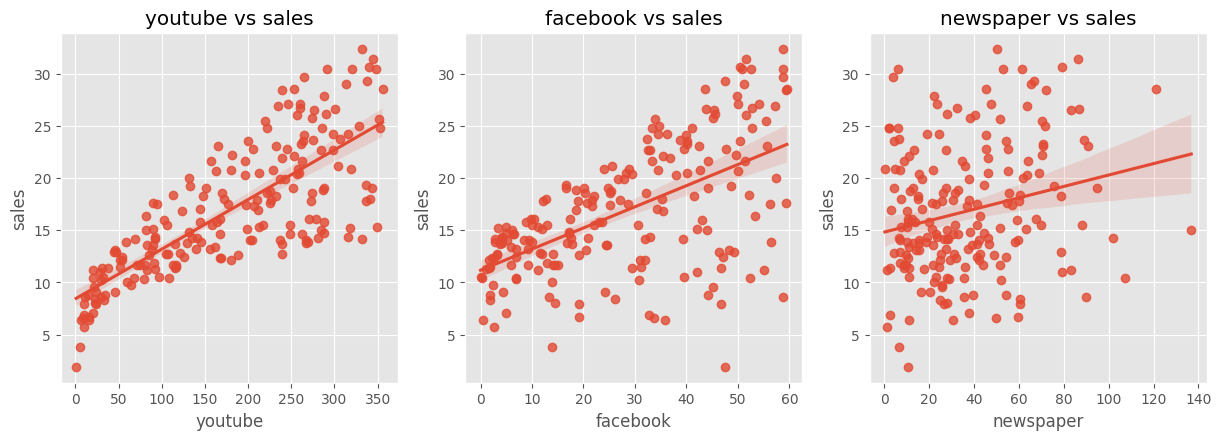

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(245)
sns.regplot(x=df['youtube'], y=df['sales'], data=df)
plt.title('youtube vs sales')

plt.subplot(246)
sns.regplot(x=df['facebook'], y=df['sales'], data=df)
plt.title('facebook vs sales')

plt.subplot(247)
sns.regplot(x=df['newspaper'], y=df['sales'], data=df)
plt.title('newspaper vs sales')

plt.show()

**Vamos a hacer el escalamiento de nuestros datos**

In [9]:
# dividamos nuestro conjunto de variables a solo las variables independientes
df_without_dv = df[['youtube', 'facebook', 'newspaper']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_dv)
df_scaled = pd.DataFrame(data=df_scaled, columns=['youtube', 'facebook', 'newspaper'])
df_scaled['sales'] = df['sales']
df_scaled

,youtube,facebook,newspaper,sales
0,0.969852,0.981522,1.778945,26.52
1,-1.197376,1.082808,0.669579,12.48
2,-1.516155,1.528463,1.783549,11.16
3,0.052050,1.217855,1.286405,22.20
4,0.394182,-0.841614,1.281802,15.48
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,9.12
196,-0.617035,-1.240003,-1.033598,11.64
197,0.349810,-0.942899,-1.111852,15.36
198,1.594565,1.265121,1.640850,30.60


**Dividimos nuestro conjunto de datos a un 80% para entrenamiento y un 20% para testeo**

In [10]:
#Division de datos en train y test
X = df_scaled[['youtube', 'facebook', 'newspaper']]
y = df_scaled['sales']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True)

[4.41768238 3.05654168 0.        ]


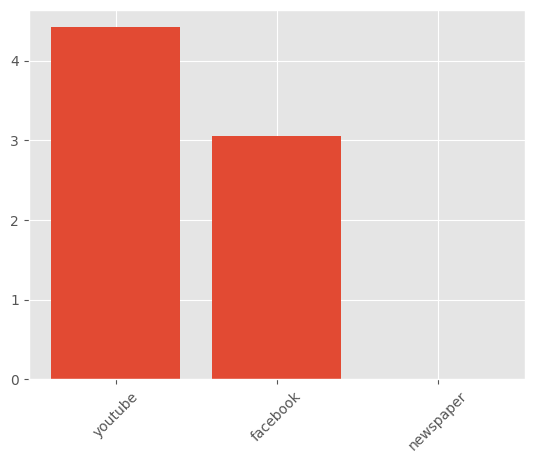

In [11]:
# quiero probar el modulo Lasso
lasso = Lasso(alpha=0.3) #instanciamos un modelo de regresion lasso
#entrenamos el modelo con los datos
lasso.fit(X,y)
#calculamos e imprimimos los coeficientes
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
columns=['youtube', 'facebook', 'newspaper']
plt.bar(columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

viendo la grafica de arriba nos queda claro que el gasto en publicidad de youtube es la caracterisitica mas importante, pero vemos que tambien la acompana el gasto en publicidad de facebook, lo que podriamos estar visualizando en si podria ser el problema de la multicolinealidad.

In [12]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog = y_train, exog = X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.01e-75
Time:                        06:13:37   Log-Likelihood:                -337.47
No. Observations:                 160   AIC:                             682.9
Df Residuals:                     156   BIC:                             695.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8369      0.160    105.431      0.0

**Podemos ver que ahora el numero de condicion ha bajado notablemente, enonces ya no hay riesgos de multicolinealidad**

In [13]:
#Error de test
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
mae = mean_absolute_error(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MAE: 1.4783645387872422
MSE: 4.184483095620175
R^2: 0.9073615858587188


**MAE**: el mae nos indica que en promedio las predicciones estan a 1.47 unidades de los valores reales.\
**MSE**: el mse es relativamente bajo y sugiere que los errores individuales no son muy grandes.\
**$R^2$**: El coeficiente de determinacion indica que aproximadamente el 90% de la variabilidad de **sales** se explica por las variables independientes.

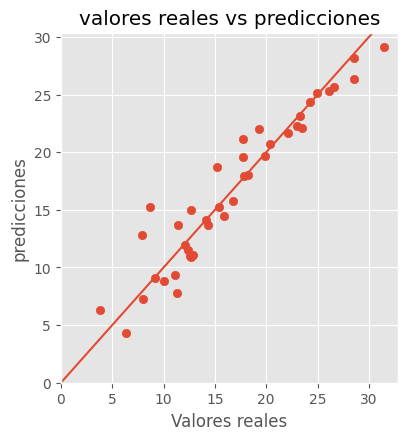

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(248)
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('predicciones')
plt.title('valores reales vs predicciones')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

plt.show()

**Podemos ver que nuestro modelo generaliza de forma decente**